In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings("ignore")
sns.set()

In [2]:
df = pd.read_csv('datasets/covid.csv')
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [3]:
df.shape

(566602, 23)

In [4]:
cols = [col for col in df.columns if col not in ['id', 'entry_date', 'date_symptoms', 'date_died']]
def convert_label(x):
    if x == 2:
        return 0
    elif x >= 97:
        return np.nan
    else:
        return x

df[cols] = df[cols].applymap(lambda x: convert_label(x))
df['icu'].value_counts()

0.0    111676
1.0     10112
Name: icu, dtype: int64

In [5]:
df['icu'] = df.apply(lambda x: 1 if x['date_died'].strip() != '9999-99-99' else x['icu'], axis=1)
df['icu'].value_counts()

0.0    83122
1.0    42340
Name: icu, dtype: int64

In [6]:
df = df[df['patient_type'] == 0] # Remove outpatient
df = df[df['covid_res'] == 1] # Only take patients with COVID

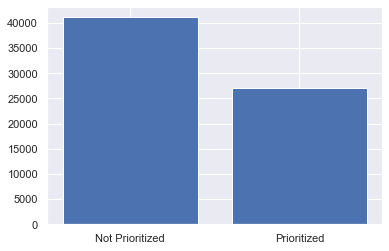

In [7]:
class_count = list(df['icu'].value_counts())
f, ax = plt.subplots()
ax.bar(["Not Prioritized", "Prioritized"], class_count)
plt.show()

In [8]:
df.drop(columns=['id', 'patient_type', 'date_died', 'pregnancy', 
                    'other_disease', 'contact_other_covid', 'covid_res'], inplace=True)
df.isnull().sum()

sex                 0
entry_date          0
date_symptoms       0
intubed            85
pneumonia           0
age                60
diabetes          380
copd              342
asthma            346
inmsupr           395
hypertension      360
cardiovascular    386
obesity           405
renal_chronic     363
tobacco           382
icu                44
dtype: int64

In [9]:
df1 = df.dropna()

In [10]:
cast_col = [col for col in df.columns if col not in ['entry_date', 'date_symptoms', 'age']]
df1[cast_col] = df1[cast_col].astype(np.int32)

In [11]:
df1['entry_date'] = pd.to_datetime(df1['entry_date'])
df1['date_symptoms'] = pd.to_datetime(df1['date_symptoms'])
df1.head()

,sex,entry_date,date_symptoms,intubed,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,cardiovascular,obesity,renal_chronic,tobacco,icu
2,1,2020-06-04,2020-01-04,0,0,54.0,0,0,0,0,0,0,1,0,0,0
3,0,2020-04-17,2020-10-04,0,1,30.0,0,0,0,0,0,0,0,0,0,0
4,1,2020-04-13,2020-04-13,0,0,60.0,1,0,0,0,1,1,0,0,0,1
5,0,2020-04-16,2020-04-16,0,1,47.0,1,0,0,0,0,0,0,0,0,1
6,0,2020-04-22,2020-04-13,0,0,63.0,0,0,0,0,1,0,0,0,0,0


In [12]:
def time_delta(row):
    return (row['entry_date'] - row['date_symptoms']).days

df1['days_after_symptoms'] = df1.apply(lambda x: time_delta(x), axis=1)

cols = [col for col in df1.columns if col not in ['entry_date', 'date_symptoms', 'days_after_symptoms']]
cols.insert(1, 'days_after_symptoms')
df1 = df1[cols]
df1.head()

,sex,days_after_symptoms,intubed,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,cardiovascular,obesity,renal_chronic,tobacco,icu
2,1,152,0,0,54.0,0,0,0,0,0,0,1,0,0,0
3,0,-170,0,1,30.0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,60.0,1,0,0,0,1,1,0,0,0,1
5,0,0,0,1,47.0,1,0,0,0,0,0,0,0,0,1
6,0,9,0,0,63.0,0,0,0,0,1,0,0,0,0,0


In [13]:
df1[cast_col] = df1[cast_col].astype('O')
df1['age'] = df1['age'].astype('int64')
df1.dtypes

sex                    object
days_after_symptoms     int64
intubed                object
pneumonia              object
age                     int64
diabetes               object
copd                   object
asthma                 object
inmsupr                object
hypertension           object
cardiovascular         object
obesity                object
renal_chronic          object
tobacco                object
icu                    object
dtype: object

In [14]:
df1['icu'].value_counts()

0    40767
1    26647
Name: icu, dtype: int64

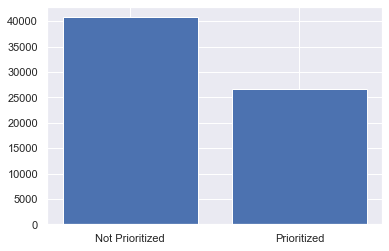

In [15]:
class_count = list(df1['icu'].value_counts())
f, ax = plt.subplots()
ax.bar(["Not Prioritized", "Prioritized"], class_count)
plt.show()

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

X = df1[df1.columns[:-1]]
y = df1[df1.columns[-1]].astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

sklearn_dtc = DecisionTreeClassifier()
sklearn_dtc.fit(X_train, y_train)
print(classification_report(np.array(y_test), sklearn_dtc.predict(X_test)))
print("F1 score: {:.3f}".format(f1_score(np.array(y_test), sklearn_dtc.predict(X_test))))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70      8154
           1       0.53      0.47      0.50      5329

    accuracy                           0.63     13483
   macro avg       0.60      0.60      0.60     13483
weighted avg       0.62      0.63      0.62     13483

F1 score: 0.498


In [17]:
y_train.value_counts()

0    32613
1    21318
Name: icu, dtype: int64

In [18]:
from imblearn.over_sampling import BorderlineSMOTE

sm = BorderlineSMOTE()

X_train_res, y_train_res = sm.fit_resample(X_train.astype('int32'), y_train)
X_train_res = X_train_res.astype(X_train.dtypes)

sklearn_dtc = DecisionTreeClassifier(max_depth=4)
sklearn_dtc.fit(X_train_res, y_train_res)
print(classification_report(np.array(y_test), sklearn_dtc.predict(X_test)))
print("F1 score: {:.3f}".format(f1_score(np.array(y_test), sklearn_dtc.predict(X_test))))

              precision    recall  f1-score   support

           0       0.68      0.63      0.65      8154
           1       0.49      0.54      0.51      5329

    accuracy                           0.60     13483
   macro avg       0.58      0.59      0.58     13483
weighted avg       0.60      0.60      0.60     13483

F1 score: 0.515


In [19]:
y_train_res.value_counts()

1    32613
0    32613
Name: icu, dtype: int64

In [20]:
from dtc import DecisionTreeClassifier

In [21]:
dtc = DecisionTreeClassifier(max_depth=4)
dtc.fit(X_train_res, y_train_res)
dtc.print_tree()

Is intubed == 1?
Information gained: 0.02388355396117592
|=== TRUE ===|
    Is pneumonia == 1?
    Information gained: 0.005714290813539635
    |=== TRUE ===|
        Is sex == 1?
        Information gained: 0.0007470352787083967
        |=== TRUE ===|
            Is days_after_symptoms >= 7?
            Information gained: 0.0009245981554010241
            |=== TRUE ===|
            {0: 0.1406003159557662, 1: 0.8593996840442338}
            |=== FALSE ===|
            {0: 0.18489835430784124, 1: 0.8151016456921588}
        |=== FALSE ===|
            Is days_after_symptoms >= -173?
            Information gained: 0.0009623622989630154
            |=== TRUE ===|
            {0: 0.13048186247969681, 1: 0.8695181375203032}
            |=== FALSE ===|
            {0: 0.019230769230769232, 1: 0.9807692307692307}
    |=== FALSE ===|
        Is days_after_symptoms >= -112?
        Information gained: 0.005550651325375411
        |=== TRUE ===|
            Is age >= 47?
            Informatio

In [22]:
print(classification_report(np.array(y_test), dtc.predict(X_test)))
print("F1 score: {:.3f}".format(f1_score(np.array(y_test), dtc.predict(X_test))))
print("Tree depth:", dtc.depth)

              precision    recall  f1-score   support

           0       0.77      0.59      0.67      8154
           1       0.54      0.73      0.62      5329

    accuracy                           0.64     13483
   macro avg       0.65      0.66      0.64     13483
weighted avg       0.68      0.64      0.65     13483

F1 score: 0.618
Tree depth: 4
